# EuroMillions analyse

With this program, I try to test two strategies for the popular EuroMillions game: one is to always bet with the same key and the other is to change the key each time you bet. To do this, I created this program that tests these two hypotheses by randomly creating around 100 million draws and, taking the rules into account, analyzing how many prizes each strategy can win.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def create_key():
    """It creates a random key with 5 numbers and 2 stars

    Returns:
        list: the key with the 7 numbers
    """
    numbers = [i for i in range(1,51)]
    stars = [i for i in range(1,10)]
    key = []
    for i in range(5):
        index = np.random.randint(0,len(numbers))
        key.append(numbers[index])
        numbers.remove(numbers[index])
    for i in range(2):
        index = np.random.randint(0,len(stars))
        key.append(stars[index])
        stars.remove(stars[index])
    return key

## Fixing the guess

In [24]:
guess = create_key()
guess

[21, 24, 50, 15, 12, 7, 5]

In [28]:
prices = {(5,2):1,(5,1):2,(5,0):3,(4,2):4,(4,1):5,(4,0):6,(3,2):7,(3,1):8,(2,2):9,(3,0):10,(1,2):11,(2,1):12}
number_prices = {0:0}
for i in range(12,0,-1):
    number_prices[i] = 0
    
for i in range(100*10**6):
    key = create_key()
    result_numbers = 0
    result_stars = 0
    for i in range(5):
        if guess[i] in key[:5]:
            result_numbers += 1    
    for i in range(5,7):
        if guess[i] in key[5:]:
            result_stars += 1
    result = (result_numbers, result_stars)
    try:
        price = prices[result]
        number_prices[price] += 1
    except:
        number_prices[0] += 1

### Results

Now let's display the number of prizes this strategy has managed to win by plotting the number of times our bet has won each of the first 6 prizes. Next, I'll present the dictionary with information on the number of times our key has won each of the 12 prizes available.

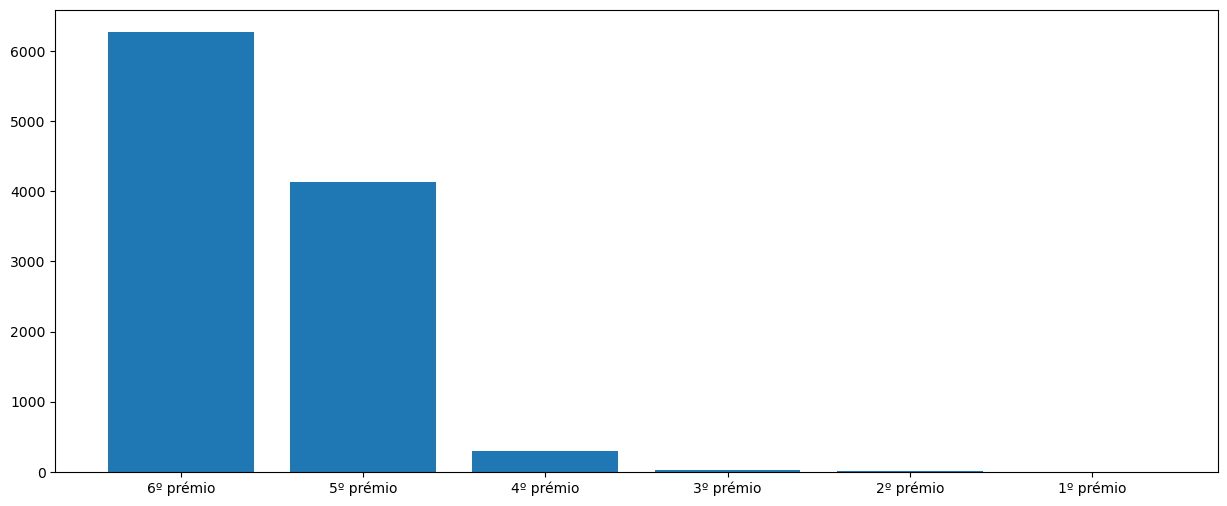

In [29]:

x = np.array(["6º prémio","5º prémio","4º prémio","3º prémio","2º prémio","1º prémio"])
y = np.array(list(number_prices.values())[7:])
plt.figure(figsize=(15,6))
plt.bar(x,y)
plt.show()

In [30]:
number_prices

{0: 95754297,
 12: 2605144,
 11: 976476,
 10: 272832,
 9: 185596,
 8: 181875,
 7: 13035,
 6: 6275,
 5: 4132,
 4: 302,
 3: 22,
 2: 12,
 1: 2}

## Changing the guess

In [31]:
prices = {(5,2):1,(5,1):2,(5,0):3,(4,2):4,(4,1):5,(4,0):6,(3,2):7,(3,1):8,(2,2):9,(3,0):10,(1,2):11,(2,1):12}
number_prices = {0:0}
for i in range(12,0,-1):
    number_prices[i] = 0
    
for i in range(100*10**6):
    guess = create_key()
    key = create_key()
    result_numbers = 0
    result_stars = 0
    for i in range(5):
        if guess[i] in key[:5]:
            result_numbers += 1    
    for i in range(5,7):
        if guess[i] in key[5:]:
            result_stars += 1
    result = (result_numbers, result_stars)
    try:
        price = prices[result]
        number_prices[price] += 1
    except:
        number_prices[0] += 1

### Results

As before I will plot the number of times our bet has won each of the first 6 prizes and then I'll present the dictionary with information on the number of times our key has won each of the 12 prizes available.

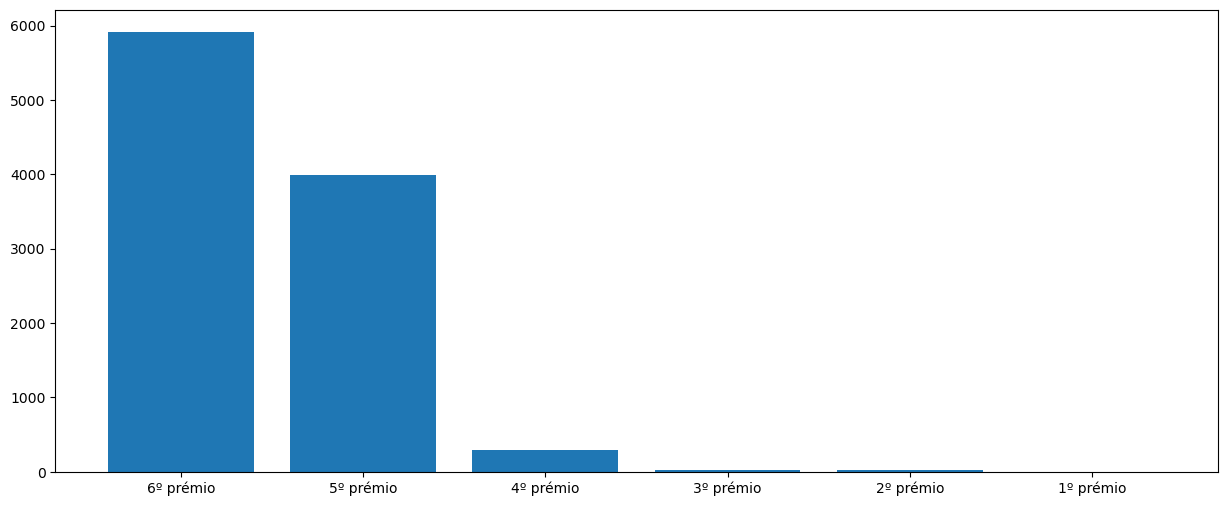

In [32]:
x = np.array(["6º prémio","5º prémio","4º prémio","3º prémio","2º prémio","1º prémio"])
y = np.array(list(number_prices.values())[7:])
plt.figure(figsize=(15,6))
plt.bar(x,y)

plt.show()

In [33]:
number_prices

{0: 95757480,
 12: 2602567,
 11: 977373,
 10: 273193,
 9: 185155,
 8: 181108,
 7: 12883,
 6: 5917,
 5: 3994,
 4: 288,
 3: 23,
 2: 18,
 1: 1}

## Conclusion

Analyzing both plots and the two dictionaries, we see the following:
- Firstly, as you would expect, the vast majority of our bets using both strategies end without a win.
- Secondly, both strategies show similar results in terms of the number of prizes won, and the differences may be due more to the randomness of the draw itself than to the strategies themselves.

From all this, we can conclude that reaching the top prize in EuroMillions is highly unlikely and that both strategies show very similar results in terms of prizes won.